In [3]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [4]:
df = pd.read_csv('C:/Users/Mustafa Badshah/OneDrive - Higher Education Commission/Desktop/project/ATS Project House prices in Karachi/house-prices-in-karachi-pakistan-2023.csv')

In [5]:
df.head()

,Unnamed: 0,Address,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards
0,0,"Bahria Town Karachi, Karachi",4200000,1,1,60
1,1,"Bahria Town - Precinct 17, Bahria Town Karachi",5900000,2,2,161
2,2,"Bahria Paradise, Bahria Town Karachi",42000000,5,5,500
3,3,"Askari 5 - Sector J, Askari 5",37500000,3,3,300
4,4,"Bahria Town - Precinct 35, Bahria Sports City",21000000,4,4,350


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16849 entries, 0 to 16848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     16849 non-null  int64 
 1   Address        16849 non-null  object
 2   Price          16849 non-null  int64 
 3   NoOfBedrooms   16849 non-null  int64 
 4   NoOfBathrooms  16849 non-null  int64 
 5   AreaSqYards    16849 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 789.9+ KB


,Unnamed: 0,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards
count,16849.000000,1.684900e+04,16849.000000,16849.00000,16849.000000
mean,9628.345480,3.914858e+07,3.599442,3.73856,238.193958
std,5673.676533,3.657066e+07,1.439704,1.46110,137.991019
min,0.000000,7.000000e+05,1.000000,1.00000,33.000000
25%,4670.000000,1.350000e+07,3.000000,3.00000,122.000000
50%,9578.000000,2.600000e+07,3.000000,3.00000,200.000000
75%,14574.000000,5.800000e+07,5.000000,5.00000,311.000000
max,19449.000000,4.000000e+08,11.000000,10.00000,993.000000


In [7]:
data1 = df

In [8]:
data1 = data1.loc[data1['Address']!="other"]
data1['Area'] = data1.apply(lambda x:  x['Address'].replace("," , ''), axis =1)
data1['Area'] = data1.apply(lambda x:  str((x['Area'].split(" "))[0] +" "+ (x['Area'].split(" "))[1] ), axis =1)
data1['Area'].unique()

C:\Users\Mustafa Badshah\AppData\Local\Temp\ipykernel_10680\2235031414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Area'] = data1.apply(lambda x:  x['Address'].replace("," , ''), axis =1)
C:\Users\Mustafa Badshah\AppData\Local\Temp\ipykernel_10680\2235031414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Area'] = data1.apply(lambda x:  str((x['Area'].split(" "))[0] +" "+ (x['Area'].split(" "))[1] ), axis =1)


array(['Bahria Town', 'Bahria Paradise', 'Askari 5', 'North Nazimabad',
       'Surjani Town', 'Garden West', 'Garden East', 'Shaheed Millat',
       'Bahria Heights', 'Saima Arabian', 'Bahria Apartments',
       'Gulistan-e-Jauhar -', 'Bahria Sports', 'PECHS Block',
       'Gulshan-e-Iqbal -', 'DHA Phase', 'Malir Cantonment',
       'North Karachi', 'Federal B', 'Rafi Premier', 'Bukhari Commercial',
       'Clifton -', 'Clifton Karachi', 'Civil Lines', 'Falcon Complex',
       'Navy Housing', 'Capital Cooperative', 'Emaar Reef',
       'Mashraqi Society', 'Scheme 33', 'Gulshan-e-Maymar Gadap',
       'DOHS Phase', 'Punjabi Saudagar', 'Defence View',
       'Gwalior Cooperative', 'Karachi University', 'Emaar Crescent',
       'Gulshan-e-Maymar -', 'Bahria Hills', 'Emaar Panorama',
       'Shamsi Society', 'Sanober Twin', 'Ittehad Commercial',
       'Tauheed Commercial', 'Emaar The', 'Sector 25-A',
       'Falaknaz Dreams', 'Gulshan-e-Iqbal Gulshan-e-Iqbal', 'North Town',
       'Bahri

In [9]:
data1.loc[data1['Area']=='Gulistan-e-Jauhar -', ['Area']] = 'Gulistan-e-Jauhar'
data1.loc[data1['Area']=='Gulshan-e-Maymar -', ['Area']] = 'Gulshan-e-Maymar'
data1.loc[data1['Area']=='Gulzar-e-Hijri Scheme', ['Area']] = 'Gulzar-e-Hijri'
data1.loc[data1['Area']=='Government Teacher', ['Area']] = 'Government Teacher Housing Society'
data1.loc[data1['Area']=='Emaar The', ['Area']] = 'Emaar The Views'
data1.loc[data1['Area']=='Gulistan-e-Jauhar Karachi', ['Area']] = 'Gulistan-e-Jauhar'
data1.loc[data1['Area']=='Karachi University', ['Area']] = 'Karachi University Housing Society'
data1.loc[data1['Area']=='Federal B', ['Area']] = 'Federal B Area'
data1.loc[data1['Area']=='DHA Phase', ['Area']] = 'DHA'
data1.loc[data1['Area']=='North Town', ['Area']] = 'North Town Residency, Surjani Town'
data1.loc[data1['Area']=='North Town Residency, Surjani Town', ['Area']] = 'North Town Residency'
data1.loc[data1['Area']=='Clifton -', ['Area']] = 'Clifton Karachi'
data1.loc[data1['Area']=='Gulshan-e-Iqbal Gulshan-e-Iqbal', ['Area']] = 'Gulshan-e-Iqbal'
data1.loc[data1['Area']=='Nazimabad -', ['Area']] = 'Nazimabad'
data1.loc[data1['Area']=='Gulshan-e-Iqbal Town', ['Area']] = 'Gulshan-e-Iqbal'
data1.loc[data1['Area']=='P &', ['Area']] = 'P & T Colony'
data1.loc[data1['Area']=='State Bank', ['Area']] = 'SBP Housing Society'
data1.loc[data1['Area']=='PECHS Block', ['Area']] = 'PECHS'
data1.loc[data1['Area']=='Korangi -', ['Area']] = 'Korangi'
data1.loc[data1['Area']=='Nazimabad 1', ['Area']] = 'Nazimabad'
data1.loc[data1['Area']=='Gulshan-e-Maymar Gadap', ['Area']] = 'Gulshan-e-Maymar'
data1.loc[data1['Area']=='Korangi Karachi', ['Area']] = 'Korangi'
data1.loc[data1['Area']=='Nazimabad Karachi', ['Area']] = 'Nazimabad'
data1.loc[data1['Area']=='Mehmoodabad Number', ['Area']] = 'Mehmoodabad Karachi'
data1.loc[data1['Area']=='Nazimabad 3', ['Area']] = 'Nazimabad'
data1.loc[data1['Area']=='Karachi Administration', ['Area']] = 'KAE Housing Society'
data1.loc[data1['Area']=='Mohammad Ali', ['Area']] = 'Mohammad Ali Society'
data1.loc[data1['Area']=='Bahadurabad Gulshan-e-Iqbal', ['Area']] = 'Bahadurabad'
data1.loc[data1['Area']=='PECHS Jamshed', ['Area']] = 'PECHS'
data1.loc[data1['Area']=='Khalid Bin', ['Area']] = 'Khalid Bin Walid Road'
data1.loc[data1['Area']=='Tariq Bin', ['Area']] = 'Tariq Bin Ziyad Society'
data1.loc[data1['Area']=='Gulshan-e-Jamal Gulshan-e-Iqbal', ['Area']] = 'Gulshan-e-Jamal'
data1.loc[data1['Area']=='Gulshan-e-Iqbal -', ['Area']] = 'Gulshan-e-Iqbal'
data1['Area'].unique()

array(['Bahria Town', 'Bahria Paradise', 'Askari 5', 'North Nazimabad',
       'Surjani Town', 'Garden West', 'Garden East', 'Shaheed Millat',
       'Bahria Heights', 'Saima Arabian', 'Bahria Apartments',
       'Gulistan-e-Jauhar', 'Bahria Sports', 'PECHS', 'Gulshan-e-Iqbal',
       'DHA', 'Malir Cantonment', 'North Karachi', 'Federal B Area',
       'Rafi Premier', 'Bukhari Commercial', 'Clifton Karachi',
       'Civil Lines', 'Falcon Complex', 'Navy Housing',
       'Capital Cooperative', 'Emaar Reef', 'Mashraqi Society',
       'Scheme 33', 'Gulshan-e-Maymar', 'DOHS Phase', 'Punjabi Saudagar',
       'Defence View', 'Gwalior Cooperative',
       'Karachi University Housing Society', 'Emaar Crescent',
       'Bahria Hills', 'Emaar Panorama', 'Shamsi Society', 'Sanober Twin',
       'Ittehad Commercial', 'Tauheed Commercial', 'Emaar The Views',
       'Sector 25-A', 'Falaknaz Dreams', 'North Town Residency',
       'Bahria Homes', 'Emaar Pearl', 'Emaar Coral', 'Amir Khusro',
       

In [10]:
data1

,Unnamed: 0,Address,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,Area
0,0,"Bahria Town Karachi, Karachi",4200000,1,1,60,Bahria Town
1,1,"Bahria Town - Precinct 17, Bahria Town Karachi",5900000,2,2,161,Bahria Town
2,2,"Bahria Paradise, Bahria Town Karachi",42000000,5,5,500,Bahria Paradise
3,3,"Askari 5 - Sector J, Askari 5",37500000,3,3,300,Askari 5
4,4,"Bahria Town - Precinct 35, Bahria Sports City",21000000,4,4,350,Bahria Town
...,...,...,...,...,...,...,...
16844,19445,"Gulshan-e-Iqbal - Block 13/D-1, Gulshan-e-Iqbal",4900000,2,2,67,Gulshan-e-Iqbal
16845,19446,"Emaar Pearl Towers, Emaar Crescent Bay",67500000,3,4,243,Emaar Pearl
16846,19447,"Federal B Area, Karachi",4500000,2,1,67,Federal B Area
16847,19448,"Gulshan-e-Iqbal - Block 13/C, Gulshan-e-Iqbal",25000000,4,4,240,Gulshan-e-Iqbal


In [11]:
# Drop the specified columns from the DataFrame
data1.drop(['Unnamed: 0', 'Address'], axis=1, inplace=True)


C:\Users\Mustafa Badshah\AppData\Local\Temp\ipykernel_10680\1713154546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.drop(['Unnamed: 0', 'Address'], axis=1, inplace=True)


In [12]:
data1

,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,Area
0,4200000,1,1,60,Bahria Town
1,5900000,2,2,161,Bahria Town
2,42000000,5,5,500,Bahria Paradise
3,37500000,3,3,300,Askari 5
4,21000000,4,4,350,Bahria Town
...,...,...,...,...,...
16844,4900000,2,2,67,Gulshan-e-Iqbal
16845,67500000,3,4,243,Emaar Pearl
16846,4500000,2,1,67,Federal B Area
16847,25000000,4,4,240,Gulshan-e-Iqbal


In [13]:
data1.isnull().sum()

Price            0
NoOfBedrooms     0
NoOfBathrooms    0
AreaSqYards      0
Area             0
dtype: int64

In [14]:
data1['NoOfBedrooms'].unique()

array([ 1,  2,  5,  3,  4,  6,  8,  7,  9, 11, 10], dtype=int64)

In [15]:
data1['NoOfBathrooms'].unique()

array([ 1,  2,  5,  3,  4,  6,  7,  8, 10,  9], dtype=int64)

In [16]:
data1['AreaSqYards'].unique()

array([ 60, 161, 500, 300, 350, 272, 375, 150, 111,  80,  47, 167, 160,
       128, 302, 152, 235, 122, 125, 120, 106, 200, 156, 178, 211, 240,
       183, 117,  59, 600, 102, 288, 400, 194, 100, 133, 189, 467, 294,
       667, 222, 428, 427, 289, 109,  91, 286, 304,  83, 550, 250, 131,
       171, 103,  72, 592, 267, 193, 243, 244, 176, 144, 158,  44,  64,
       153,  78, 135, 311, 220, 406, 333, 650, 361, 389, 268, 412,  61,
       206, 233, 256, 520, 356, 215, 460,  35,  45, 234,  97, 266, 139,
        56, 352, 325, 381,  92, 328, 108, 540,  51, 330, 130, 196,  50,
       545,  89, 411, 113, 205, 182, 384, 292, 213, 181, 223,  76,  67,
       212, 700, 309, 203,  75, 261,  58,  81, 418, 315, 112, 185, 270,
        84, 136,  94, 386,  54, 264, 367, 306,  79, 666, 570, 316, 280,
        37, 241, 180,  63, 140, 285, 249, 157, 217, 320,  70, 228, 265,
       726, 556, 263, 645, 147, 378,  55, 317, 134, 322, 410,  33, 423,
       238,  88, 345, 170, 416, 342, 344, 132,  39, 166, 437, 53

In [17]:
data1['Price_per_sq_yard'] = data1['Price'] / data1['AreaSqYards']

C:\Users\Mustafa Badshah\AppData\Local\Temp\ipykernel_10680\1878348242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Price_per_sq_yard'] = data1['Price'] / data1['AreaSqYards']


In [18]:
data1

,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,Area,Price_per_sq_yard
0,4200000,1,1,60,Bahria Town,70000.000000
1,5900000,2,2,161,Bahria Town,36645.962733
2,42000000,5,5,500,Bahria Paradise,84000.000000
3,37500000,3,3,300,Askari 5,125000.000000
4,21000000,4,4,350,Bahria Town,60000.000000
...,...,...,...,...,...,...
16844,4900000,2,2,67,Gulshan-e-Iqbal,73134.328358
16845,67500000,3,4,243,Emaar Pearl,277777.777778
16846,4500000,2,1,67,Federal B Area,67164.179104
16847,25000000,4,4,240,Gulshan-e-Iqbal,104166.666667


In [19]:
len(data1['Area'].unique())

142

In [20]:
data1['Area'] = data1['Area'].apply(lambda x: x.strip())
location_stats = data1.groupby('Area')['Area'].agg('count').sort_values(ascending=False)
location_stats.head(40)

C:\Users\Mustafa Badshah\AppData\Local\Temp\ipykernel_10680\1371457476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Area'] = data1['Area'].apply(lambda x: x.strip())


Area
Bahria Town              2177
DHA                      1865
Askari 5                 1852
Gulistan-e-Jauhar        1121
Gulshan-e-Iqbal           914
North Nazimabad           568
Clifton Karachi           521
Falcon Complex            477
PECHS                     253
Gulshan-e-Maymar          240
Bahria Apartments         238
Federal B Area            213
Navy Housing              201
Model Colony              166
Bath Island               144
Bahria Heights            141
Emaar Pearl               116
Scheme 33                 116
Shaheed Millat            110
Bahria Paradise           106
Saadi Town                106
Bahria Sports             102
North Karachi              97
Saima Arabian              94
Falaknaz Presidency        93
Bukhari Commercial         87
Bahadurabad                85
Frere Town                 84
Khalid Bin Walid Road      84
Nazimabad                  80
Allahwala Town             79
Civil Lines                79
Emaar Crescent             70
Shahm

In [21]:
len(location_stats[location_stats <= 15])

42

In [22]:
#Notice that there are 42 locations that are having properties less than 15 so we can categorize 
#them as others which will help us in dimensionality reduction in our machine learning model.
locations_less_than_10 = location_stats[location_stats <= 15]
data1['Area'] = data1['Area'].apply(lambda x:'others' if x in locations_less_than_10 else x)


C:\Users\Mustafa Badshah\AppData\Local\Temp\ipykernel_10680\56409536.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Area'] = data1['Area'].apply(lambda x:'others' if x in locations_less_than_10 else x)


In [23]:
data1['Area'].nunique()
#Firstly there were 142 unique locations and now we are having only
#101 unique locations after dimensionality reduction

101

In [24]:
data1

,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,Area,Price_per_sq_yard
0,4200000,1,1,60,Bahria Town,70000.000000
1,5900000,2,2,161,Bahria Town,36645.962733
2,42000000,5,5,500,Bahria Paradise,84000.000000
3,37500000,3,3,300,Askari 5,125000.000000
4,21000000,4,4,350,Bahria Town,60000.000000
...,...,...,...,...,...,...
16844,4900000,2,2,67,Gulshan-e-Iqbal,73134.328358
16845,67500000,3,4,243,Emaar Pearl,277777.777778
16846,4500000,2,1,67,Federal B Area,67164.179104
16847,25000000,4,4,240,Gulshan-e-Iqbal,104166.666667


In [25]:
data1

,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,Area,Price_per_sq_yard
0,4200000,1,1,60,Bahria Town,70000.000000
1,5900000,2,2,161,Bahria Town,36645.962733
2,42000000,5,5,500,Bahria Paradise,84000.000000
3,37500000,3,3,300,Askari 5,125000.000000
4,21000000,4,4,350,Bahria Town,60000.000000
...,...,...,...,...,...,...
16844,4900000,2,2,67,Gulshan-e-Iqbal,73134.328358
16845,67500000,3,4,243,Emaar Pearl,277777.777778
16846,4500000,2,1,67,Federal B Area,67164.179104
16847,25000000,4,4,240,Gulshan-e-Iqbal,104166.666667


<Axes: >

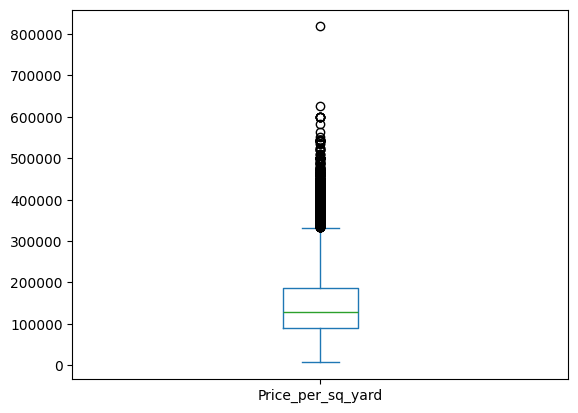

In [26]:
data1['Price_per_sq_yard'].plot.box()

In [27]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data1['Price_per_sq_yard'].quantile(0.25)
Q3 = data1['Price_per_sq_yard'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

#Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data1_no_outliers = data1[(data1['Price_per_sq_yard'] >= lower_bound) & (data1['Price_per_sq_yard'] <= upper_bound)]


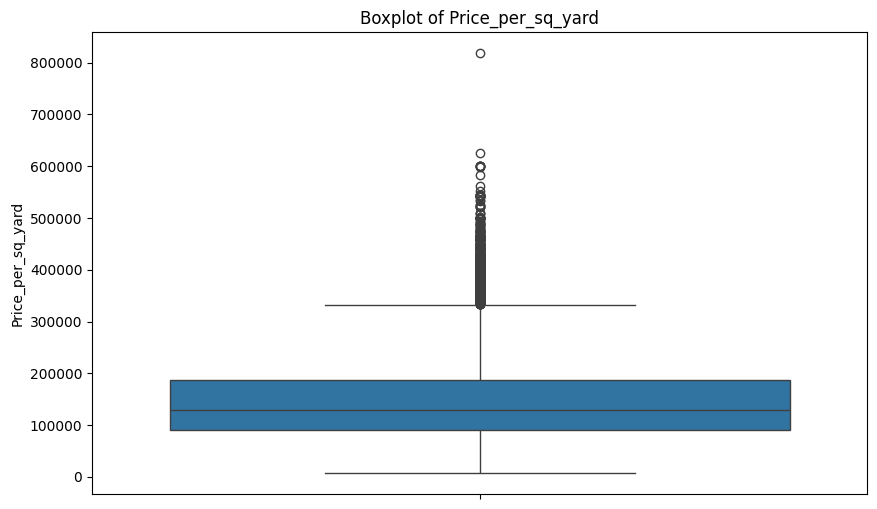

In [28]:
# Boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data1['Price_per_sq_yard'])
plt.title('Boxplot of Price_per_sq_yard')
plt.show()


In [29]:
data2 =data1_no_outliers
data2

,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,Area,Price_per_sq_yard
0,4200000,1,1,60,Bahria Town,70000.000000
1,5900000,2,2,161,Bahria Town,36645.962733
2,42000000,5,5,500,Bahria Paradise,84000.000000
3,37500000,3,3,300,Askari 5,125000.000000
4,21000000,4,4,350,Bahria Town,60000.000000
...,...,...,...,...,...,...
16844,4900000,2,2,67,Gulshan-e-Iqbal,73134.328358
16845,67500000,3,4,243,Emaar Pearl,277777.777778
16846,4500000,2,1,67,Federal B Area,67164.179104
16847,25000000,4,4,240,Gulshan-e-Iqbal,104166.666667


In [30]:
import matplotlib
def plot_scatter_chart(df, location):
    bedroom_2 = df[(df['Area'] == location) & (df['NoOfBedrooms'] == 2)]
    bedroom_3 = df[(df['Area'] == location) & (df['NoOfBedrooms'] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bedroom_2['AreaSqYards'], bedroom_2['Price']/100000, color='blue', label="2 Bedroom", s=50)
    plt.scatter(bedroom_3['AreaSqYards'], bedroom_3['Price']/100000, marker='+', color="green", label="3 Bedroom", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

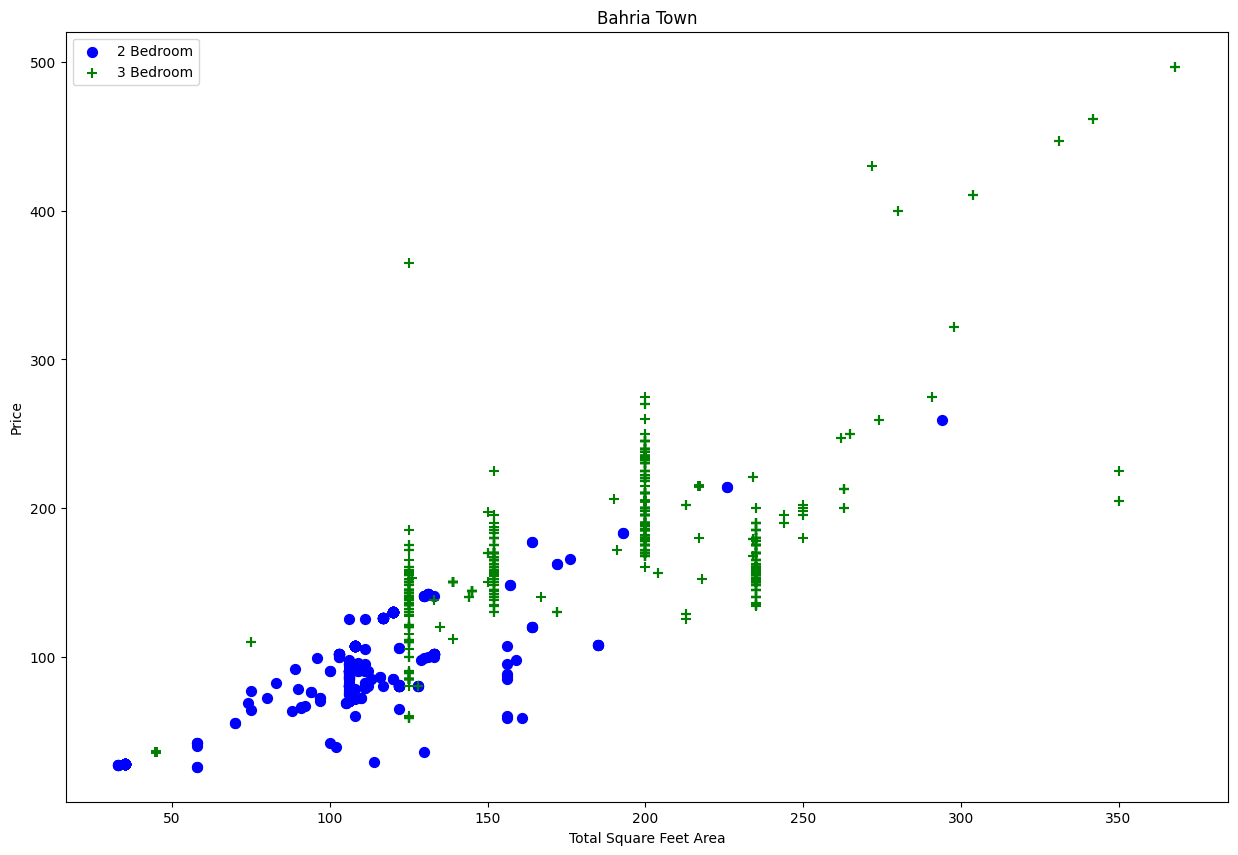

In [31]:
plot_scatter_chart(data2, "Bahria Town")

In [32]:
#Notice in the above graph that there are some properties having 3 bedrooms still in less price
#than 2 bedrooms properties in a specfied location. Now they can also be considered as outliers
#and we should also remove them so that they cannot affect our model performance

In [33]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("Area"):
        bhk_stats = {}
        for bedroom, bedroom_df in location_df.groupby("NoOfBedrooms"):
            bhk_stats[bedroom] = {
                'mean' : np.mean(bedroom_df["Price_per_sq_yard"]),
                'std' : np.std(bedroom_df["Price_per_sq_yard"]),
                'count': bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in location_df.groupby("NoOfBedrooms"):
            stats = bhk_stats.get(bedroom - 1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bedroom_df[bedroom_df['Price_per_sq_yard'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis="index")

In [34]:
data3 = remove_bhk_outliers(data2)
data3

,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,Area,Price_per_sq_yard
0,4200000,1,1,60,Bahria Town,70000.000000
2,42000000,5,5,500,Bahria Paradise,84000.000000
3,37500000,3,3,300,Askari 5,125000.000000
5,46500000,5,5,500,Bahria Paradise,93000.000000
6,35000000,5,6,272,Bahria Town,128676.470588
...,...,...,...,...,...,...
16841,8145000,2,2,83,Scheme 33,98132.530120
16842,70000000,2,2,212,Emaar The Views,330188.679245
16844,4900000,2,2,67,Gulshan-e-Iqbal,73134.328358
16846,4500000,2,1,67,Federal B Area,67164.179104


In [35]:
data3.groupby('Area')['Area'].agg('count').sort_values(ascending=False).head(40)


Area
Askari 5                 1793
Bahria Town              1385
DHA                       927
Gulistan-e-Jauhar         803
Gulshan-e-Iqbal           692
North Nazimabad           393
others                    323
Clifton Karachi           311
Gulshan-e-Maymar          216
Falcon Complex            205
Federal B Area            172
PECHS                     160
Bahria Apartments         147
Model Colony              145
Bahria Heights            140
Navy Housing              136
Bath Island               118
Bahria Paradise           106
Scheme 33                 102
Bahria Sports              93
Saima Arabian              92
Falaknaz Presidency        86
Shaheed Millat             78
Allahwala Town             78
Bukhari Commercial         70
Shahmir Residency          69
North Karachi              68
Frere Town                 67
Bahria Homes               67
Capital Cooperative        64
Nazimabad                  63
Saadi Town                 60
Naya Nazimabad             51
Diamo

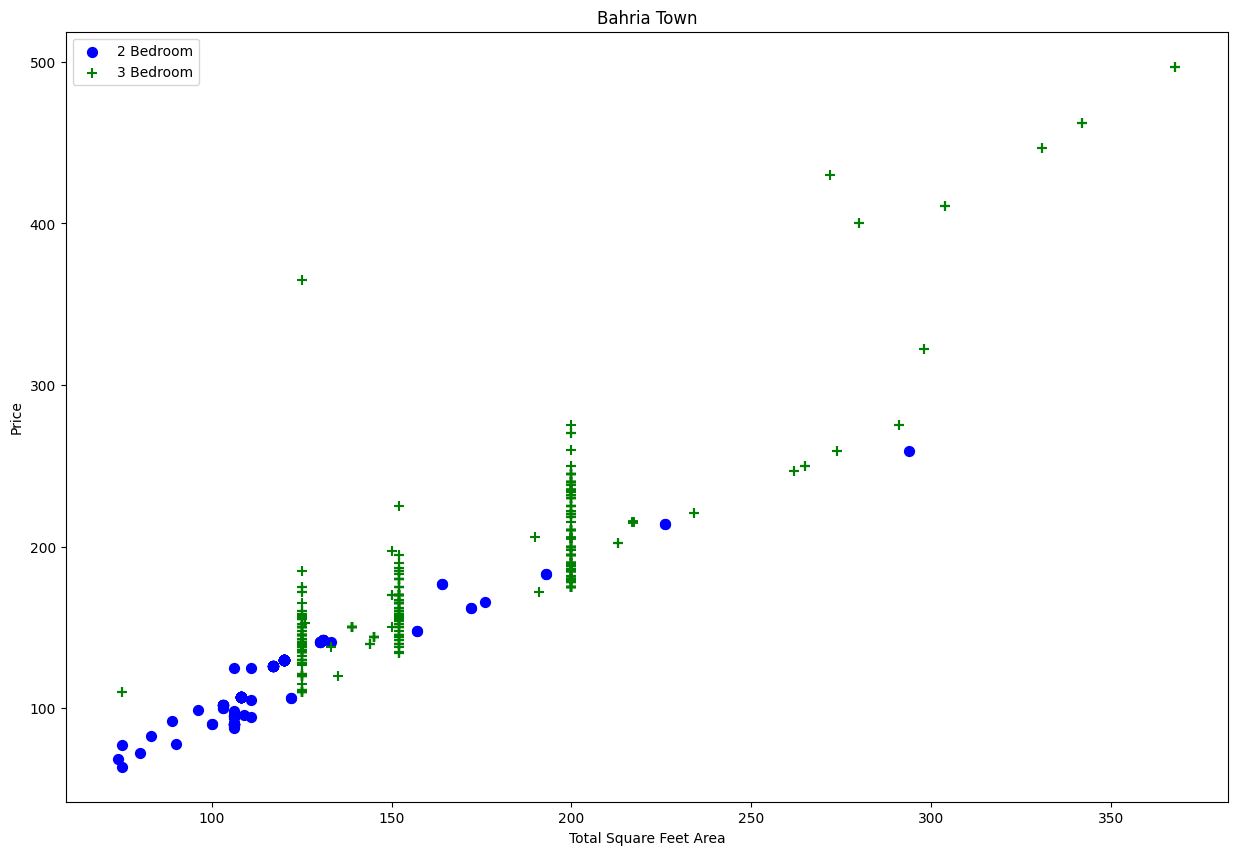

In [36]:
plot_scatter_chart(data3,"Bahria Town")


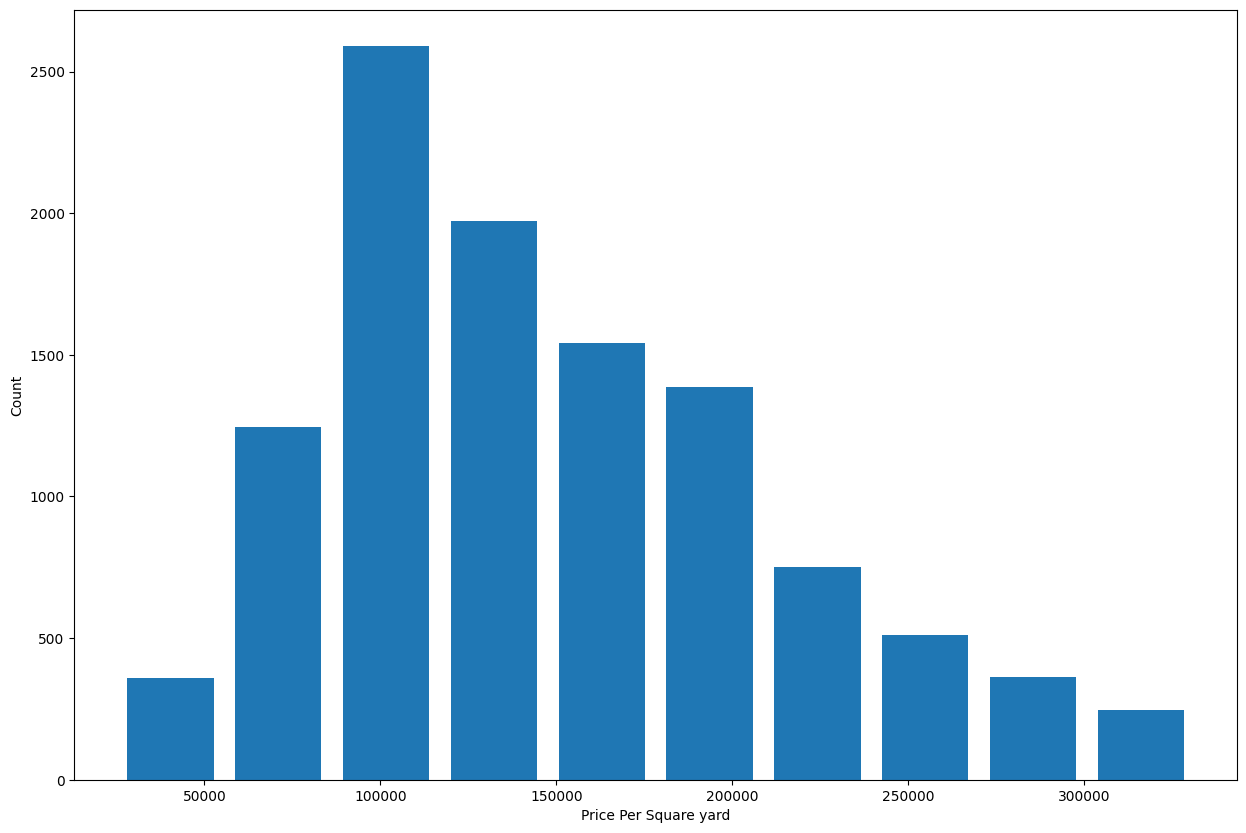

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(data3['Price_per_sq_yard'], rwidth=0.8)
plt.xlabel("Price Per Square yard")
plt.ylabel("Count")
plt.show()

#10000 price per square yard is the most common price


In [38]:
data3[data3['NoOfBathrooms'] > data3['NoOfBedrooms']]



,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,Area,Price_per_sq_yard
6,35000000,5,6,272,Bahria Town,128676.470588
16,18500000,3,4,167,others,110778.443114
38,25000000,4,5,211,others,118483.412322
82,42500000,3,4,189,Clifton Karachi,224867.724868
84,92800000,3,5,294,Civil Lines,315646.258503
...,...,...,...,...,...,...
16784,45000000,3,4,194,Shaheed Millat,231958.762887
16790,8500000,2,3,83,North Nazimabad,102409.638554
16804,32500000,2,3,111,Shaheed Millat,292792.792793
16826,32500000,3,4,267,Gulshan-e-Iqbal,121722.846442


In [39]:
# This checks if the number of bathrooms in each row is greater than the number of bedrooms in the same row plus 2.
data3[data3['NoOfBathrooms'] > data3['NoOfBedrooms']+2]


,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,Area,Price_per_sq_yard
987,27500000,3,6,240,Gulshan-e-Maymar,114583.333333
4385,44000000,3,6,261,Clifton Karachi,168582.375479
4420,44000000,3,6,261,Clifton Karachi,168582.375479
7083,90000000,4,7,422,DHA,213270.142180
8123,159000000,6,9,500,DHA,318000.000000
8181,159000000,6,9,500,DHA,318000.000000
12370,65000000,3,6,361,Creek Vista,180055.401662
12427,65000000,3,6,361,Creek Vista,180055.401662
16715,17000000,4,7,120,North Karachi,141666.666667


In [40]:
data4 = data3.drop(data3[data3['NoOfBathrooms'] > data3['NoOfBedrooms']+2].index)
data4.shape

(10953, 6)

In [41]:
#As we add the column price_per_sqft for our dimensionality reduction we will now remove
#this column as this is not a feature for predicting property pricing
data5 = data4.drop("Price_per_sq_yard", axis=1)

In [42]:
data5.head()


,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,Area
0,4200000,1,1,60,Bahria Town
2,42000000,5,5,500,Bahria Paradise
3,37500000,3,3,300,Askari 5
5,46500000,5,5,500,Bahria Paradise
6,35000000,5,6,272,Bahria Town


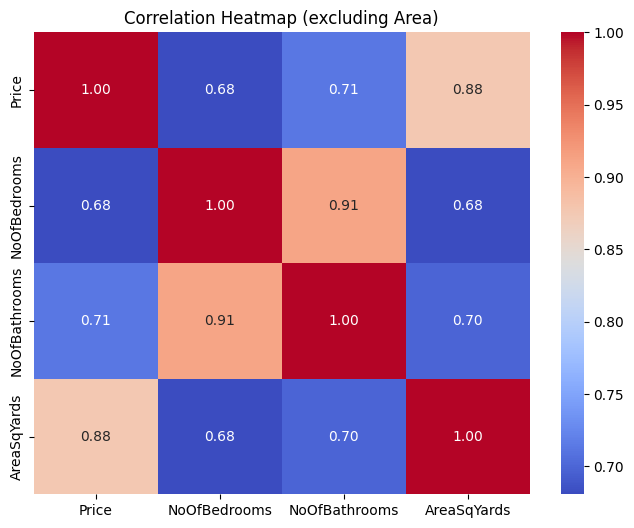

In [43]:
# Drop the 'Area' column and compute the correlation matrix
correlation_matrix = data5.drop(columns=['Area']).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add title and show plot
plt.title('Correlation Heatmap (excluding Area)')
plt.show()

<Figure size 800x600 with 0 Axes>

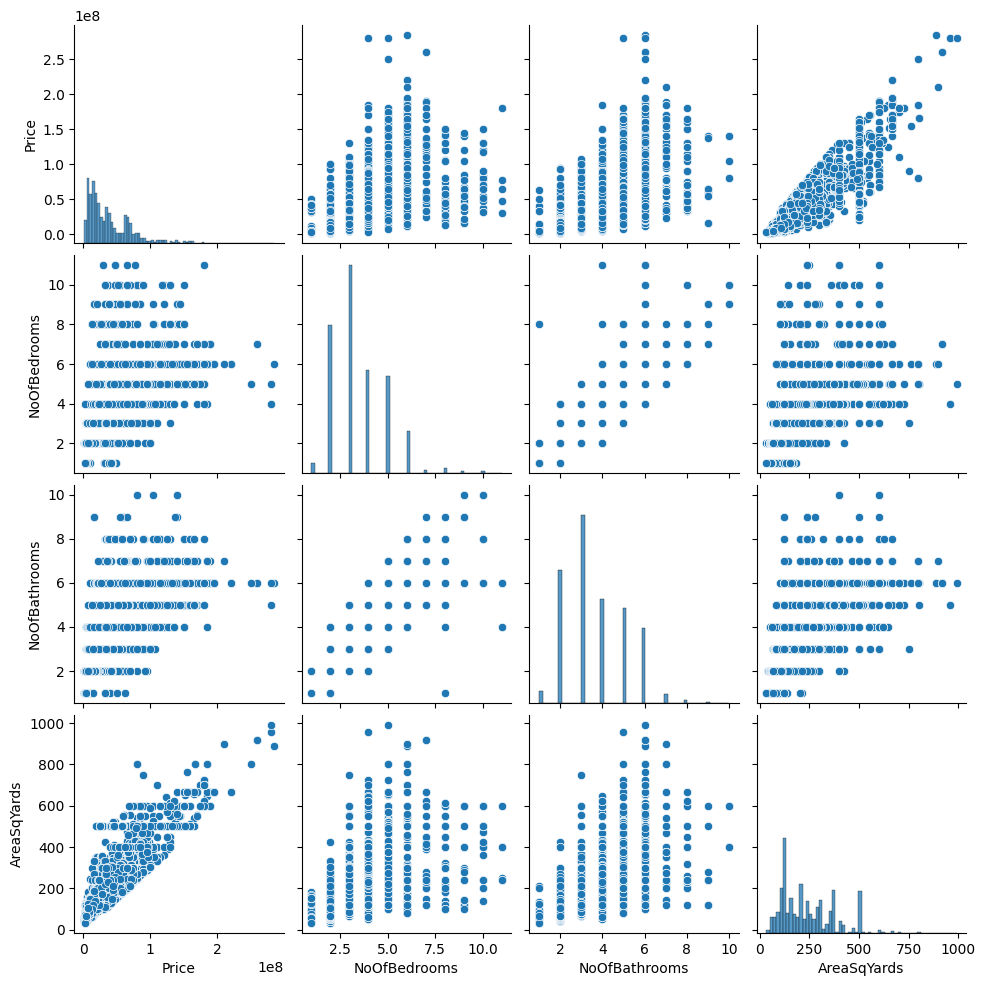

In [44]:
plt.figure(figsize=(8, 6))
sns.pairplot(data5)

In [45]:
#we make dummies of our locations
dummies = pd.get_dummies(data5['Area'])
dummies.head(3)

,Al-Murtaza Commercial,Allahwala Town,Amir Khusro,Askari 4,Askari 5,Badar Commercial,Bahadurabad,Bahria Apartments,Bahria Central,Bahria Heights,...,Shaheed Millat,Shahmir Residency,Shahra-e-Faisal Karachi,Shamsi Society,Sharfabad Gulshan-e-Iqbal,Shaz Residency,Surjani Town,Tulip Tower,University Road,others
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
# Concatenate the original DataFrame (excluding 'Area') with the dummy variables
data6 = pd.concat([data5.drop('Area', axis=1), dummies.drop('others', axis=1)], axis='columns')

# Display the first few rows of the updated DataFrame
print(data6.head())

# Display the shape of the updated DataFrame
print(data6.shape)

      Price  NoOfBedrooms  NoOfBathrooms  AreaSqYards  Al-Murtaza Commercial  \
0   4200000             1              1           60                  False   
2  42000000             5              5          500                  False   
3  37500000             3              3          300                  False   
5  46500000             5              5          500                  False   
6  35000000             5              6          272                  False   

   Allahwala Town  Amir Khusro  Askari 4  Askari 5  Badar Commercial  ...  \
0           False        False     False     False             False  ...   
2           False        False     False     False             False  ...   
3           False        False     False      True             False  ...   
5           False        False     False     False             False  ...   
6           False        False     False     False             False  ...   

   Shadman Town  Shaheed Millat  Shahmir Residency  Shah

In [47]:
X = data6.drop('Price', axis=1) # Features
X.head()

,NoOfBedrooms,NoOfBathrooms,AreaSqYards,Al-Murtaza Commercial,Allahwala Town,Amir Khusro,Askari 4,Askari 5,Badar Commercial,Bahadurabad,...,Shadman Town,Shaheed Millat,Shahmir Residency,Shahra-e-Faisal Karachi,Shamsi Society,Sharfabad Gulshan-e-Iqbal,Shaz Residency,Surjani Town,Tulip Tower,University Road
0,1,1,60,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5,5,500,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,3,300,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,5,5,500,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,5,6,272,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
y = data6['Price'] # Predictor or predicted_variable
y.head(100)

0        4200000
2       42000000
3       37500000
5       46500000
6       35000000
         ...    
133     39500000
134    132000000
136     75000000
138     68000000
139     74500000
Name: Price, Length: 100, dtype: int64

In [49]:
data6['Price'].describe()

count    1.095300e+04
mean     3.869748e+07
std      3.287634e+07
min      1.250000e+06
25%      1.450000e+07
50%      2.800000e+07
75%      5.950000e+07
max      2.850000e+08
Name: Price, dtype: float64

In [50]:
data6

,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,Al-Murtaza Commercial,Allahwala Town,Amir Khusro,Askari 4,Askari 5,Badar Commercial,...,Shadman Town,Shaheed Millat,Shahmir Residency,Shahra-e-Faisal Karachi,Shamsi Society,Sharfabad Gulshan-e-Iqbal,Shaz Residency,Surjani Town,Tulip Tower,University Road
0,4200000,1,1,60,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,42000000,5,5,500,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,37500000,3,3,300,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,46500000,5,5,500,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,35000000,5,6,272,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16841,8145000,2,2,83,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16842,70000000,2,2,212,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16844,4900000,2,2,67,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16846,4500000,2,1,67,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Applying ML Model

In [51]:
from sklearn.model_selection import train_test_split # for dividing data into training and test sets
from sklearn.linear_model import LinearRegression # for predicting price


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9065972942899816

In [52]:
#Note that our linear regression model performs with 90% accuracy which is quite good
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.9146306 , 0.90954078, 0.91335408, 0.91282431, 0.91000522])

In [53]:
#Then use shuffle split for our cross validation and it gives the maximum accuracy of 91%.
# importing other regression models to find the best performing model using GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [54]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {'fit_intercept': [True, False]}  # Updated parameters
        },
        'decision_tree_regressor': {
            'model': DecisionTreeRegressor(),
            'params': {'criterion': ['mse', 'friedman_mse'], 'splitter': ['best', 'random']}
        },
        'lasso': {
            'model': Lasso(),
            'params': {'alpha': [0.1, 1, 2], 'selection': ['random', 'cyclic']}
        }
    }
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    scores = []
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], return_train_score=False, n_jobs=-1, cv=cv)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage:
# df = pd.read_csv('your_data.csv')
# X = df.drop('target_column', axis=1)
# y = df['target_column']
# print(find_best_model_using_gridsearchcv(X, y))


In [55]:
find_best_model_using_gridsearchcv(X, y)

c:\Users\Mustafa Badshah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mustafa Badshah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mustafa Badshah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Mustafa Badshah\AppData\Local\Programs\Python\Pyth

,model,best_score,best_params
0,linear_regression,0.912071,{'fit_intercept': True}
1,decision_tree_regressor,0.954098,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,lasso,0.912071,"{'alpha': 2, 'selection': 'random'}"


In [56]:
#As decision_tree_regressor performs the best with 95% accuracy we will be using its best params and bulding our model.
dtr = DecisionTreeRegressor(criterion='friedman_mse', splitter='random', random_state=0)
dtr.fit(X, y)

DecisionTreeRegressor(criterion='friedman_mse', random_state=0,
                      splitter='random')

In [57]:
X.columns

Index(['NoOfBedrooms', 'NoOfBathrooms', 'AreaSqYards', 'Al-Murtaza Commercial',
       'Allahwala Town', 'Amir Khusro', 'Askari 4', 'Askari 5',
       'Badar Commercial', 'Bahadurabad',
       ...
       'Shadman Town', 'Shaheed Millat', 'Shahmir Residency',
       'Shahra-e-Faisal Karachi', 'Shamsi Society',
       'Sharfabad Gulshan-e-Iqbal', 'Shaz Residency', 'Surjani Town',
       'Tulip Tower', 'University Road'],
      dtype='object', length=103)

In [58]:
def predict_price(location, sqft, bedrooms, baths):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = sqft
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1
    return dtr.predict([x])[0] / 100000

In [59]:
training_data_prediction = lr.predict(X_train)


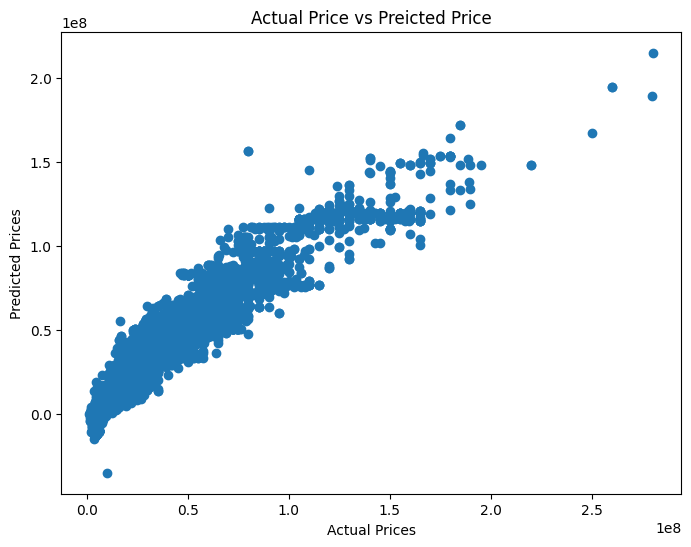

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

C:\Users\Mustafa Badshah\AppData\Local\Temp\ipykernel_10680\2464030976.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


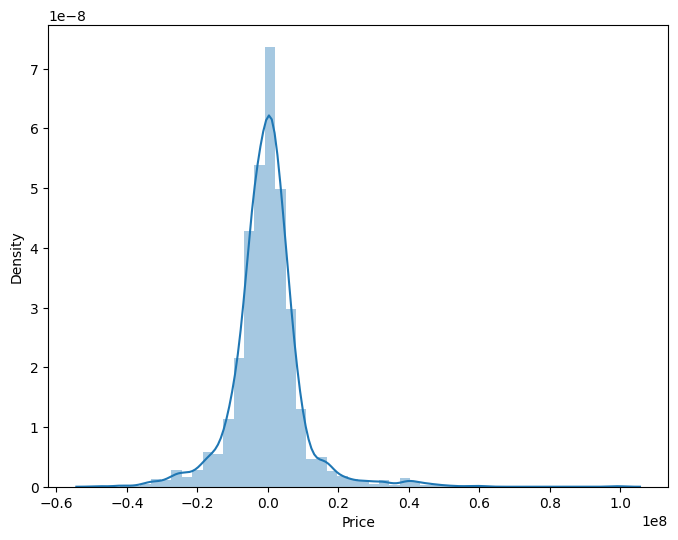

In [61]:
#In the above scatter plot, we see data is in a line form, 
#which means our model has done good predictions.
plt.figure(figsize=(8, 6))
predictions = lr.predict(X_test)
sns.distplot((y_test-predictions),bins=50);

In [62]:
#In the above histogram plot, we see data is in bell shape (Normally Distributed),
#which means our model has done good predictions.

Now it time to test model through Input  

In [63]:
print(str(int(predict_price('Nazimabad', 1800, 4, 3))) + " Lakhs")

95 Lakhs


c:\Users\Mustafa Badshah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [64]:
print(str(int(predict_price('Scheme 33', 1080, 3, 2))) + " Lakhs")


150 Lakhs


c:\Users\Mustafa Badshah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [65]:
print(str(int(predict_price('Bahria Town', 1388.48, 3, 3))) + " Lakhs")


50 Lakhs


c:\Users\Mustafa Badshah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [66]:
import joblib

In [67]:
joblib.dump(dtr, 'decision_tree_regressor.pkl')

['decision_tree_regressor.pkl']

In [68]:
model = joblib.load('decision_tree_regressor.pkl')

In [69]:
# import joblib
# model = joblib.load('model.pkl')

In [71]:
def predict_price(model, location, sqft, bedrooms, baths):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = baths
    x[1] = sqft
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1
    return model.predict([x])[0] / 100000

In [75]:
import json

# Save column names to a JSON file
columns = list(X.columns)  # Convert column names to a list
with open('columns-v1.json', 'w') as file:
    json.dump(columns, file)


In [73]:
print(str(int(predict_price(model, 'Bahria Town', 1388.48, 3, 3))) + " Lakhs")


50 Lakhs


c:\Users\Mustafa Badshah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [74]:
X.columns

Index(['NoOfBedrooms', 'NoOfBathrooms', 'AreaSqYards', 'Al-Murtaza Commercial',
       'Allahwala Town', 'Amir Khusro', 'Askari 4', 'Askari 5',
       'Badar Commercial', 'Bahadurabad',
       ...
       'Shadman Town', 'Shaheed Millat', 'Shahmir Residency',
       'Shahra-e-Faisal Karachi', 'Shamsi Society',
       'Sharfabad Gulshan-e-Iqbal', 'Shaz Residency', 'Surjani Town',
       'Tulip Tower', 'University Road'],
      dtype='object', length=103)

In [ ]:
#Export the tested model to a pickle file
#import pickle
#with open('model.pkl','wb') as f:
#       pickle.dump(lr,f)

In [ ]:
#Export location and column information to a file that will be
#useful later on in our prediction application
'''''''
#import json
#columns = {
#   'data_columns' : [col.lower() for col in X.columns]
#}
#with open("columns.json","w") as f:
#   f.write(json.dumps(columns))


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [ ]:
import json
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Load column names from JSON file
with open('columns-v1.json', 'r') as file:
    columns = json.load(file)

# Example: Load the trained model
model = joblib.load('decision_tree_regressor.pkl')  # Use joblib or pickle to load your model

def predict_price(model, location, sqft, bedrooms, baths):
    loc_index = columns.index(location) if location in columns else -1
    
    x = np.zeros(len(columns))
    x[0] = baths
    x[1] = sqft
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1
    
    return model.predict([x])[0] / 100000

# Example usage
price = predict_price(model, 'Bahria Town', 1388.48, 3, 3)
print(f'Predicted Price: {price}')


In [ ]:
print(str(int(predict_price(model, 'Bahria Town', 1388.48, 3, 3))) + " Lakhs")
